Created the database of NTC sensor with the 4 features  [ "timestamp", "ntc_indoor_temperature", "ntc_outdoor _temperature", "desired_temperature" ] and the combination that is based on the indian temperature.

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

In [2]:
data = pd.read_csv("C:/Users/hp/OneDrive/Desktop/Ac_optimization/temperature_data.csv")

In [3]:
data

,Indoor Temperature (°C),Outdoor Temperature (°C),Desired Temperature (°C)
0,22,27,20
1,35,45,21
2,30,34,20
3,26,42,21
4,23,32,21
...,...,...,...
99995,17,41,21
99996,34,53,21
99997,31,47,21
99998,31,37,20


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   Indoor Temperature (°C)   100000 non-null  int64
 1   Outdoor Temperature (°C)  100000 non-null  int64
 2   Desired Temperature (°C)  100000 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


converting the features into round off

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   Indoor Temperature (°C)   100000 non-null  int64
 1   Outdoor Temperature (°C)  100000 non-null  int64
 2   Desired Temperature (°C)  100000 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


firstly i train the model with linear regression

Mean Squared Error: 0.5367820456470793
R^2 Score: 0.7556824037809797


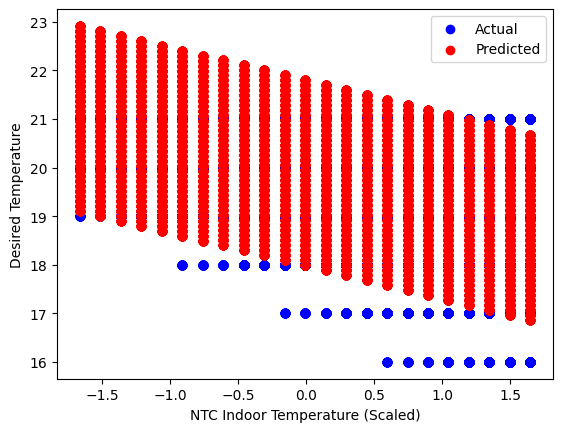

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = data[['Indoor Temperature (°C)','Outdoor Temperature (°C)']].values
y = data['Desired Temperature (°C)'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Evaluate the model
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualize the results
# Choose one feature for visualization, for example, indoor temperature:
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted')
plt.xlabel('NTC Indoor Temperature (Scaled)')  # Update the x-axis label
plt.ylabel('Desired Temperature')
plt.legend()
plt.show()

Mean Squared Error: 0.0
R^2 Score: 1.0


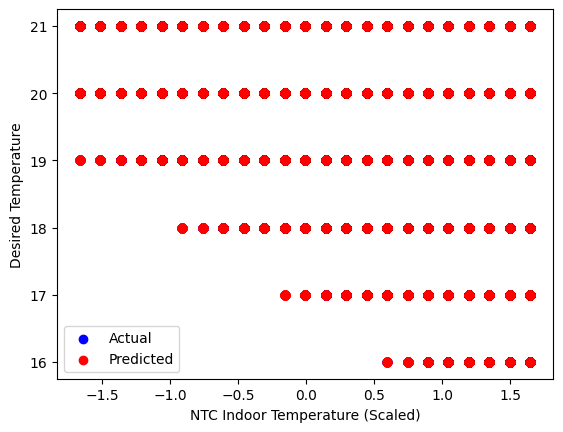

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Visualize the results
# Choose one feature for visualization, for example, indoor temperature:
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted')
plt.xlabel('NTC Indoor Temperature (Scaled)')  # Update the x-axis label
plt.ylabel('Desired Temperature')
plt.legend()
plt.show()


In [20]:
import numpy as np
import pandas as pd

def predict_desired_temp():
    """
    Predicts the desired AC temperature based on user input for indoor and outdoor temperatures.
    """
    # Ask for user inputs
    ntc_indoor = int(input("Enter NTC indoor sensor temperature (in degrees Celsius): "))
    ntc_outdoor = int(input("Enter NTC outdoor sensor temperature (in degrees Celsius): "))

    # Create a DataFrame with the same feature names as used during training
    input_data = pd.DataFrame({
        'Indoor Temperature (°C)': [ntc_indoor],
        'Outdoor Temperature (°C)': [ntc_outdoor]
    })

    # Scale the input using the same scaler used for training
    ntc_temp_scaled = scaler.transform(input_data)

    # Predict the desired temperature
    predicted_desired_temp = rf_model.predict(ntc_temp_scaled)[0]
    
    # Output the rounded prediction
    print(f"Predicted desired AC temperature: {round(predicted_desired_temp)} degrees Celsius")

# Call the function to start prediction
predict_desired_temp()


Predicted desired AC temperature: 21 degrees Celsius


c:\Users\hp\OneDrive\Desktop\Ac_optimization\venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Mean Squared Error (MSE): 0.0
R^2 Score: 1.0


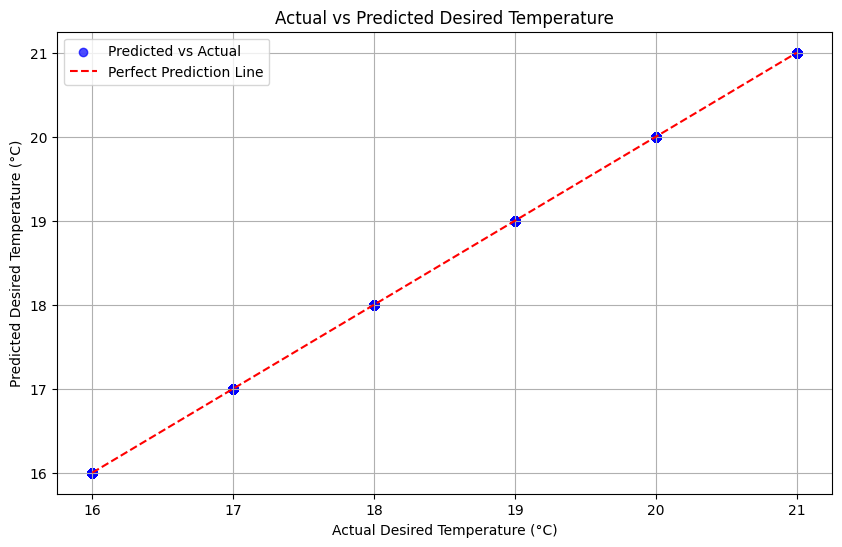

NameError: name 'st' is not defined

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))

# Plot Actual vs Predicted
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')

plt.xlabel("Actual Desired Temperature (°C)")
plt.ylabel("Predicted Desired Temperature (°C)")
plt.title("Actual vs Predicted Desired Temperature")
plt.legend()
plt.grid(True)
plt.show()

# Optional: Print individual predictions with actual values for a quick comparison
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
st.write("### Predictions vs Actual")
st.write(comparison)


#SIMPLE PREDICTION IS DONE HERE

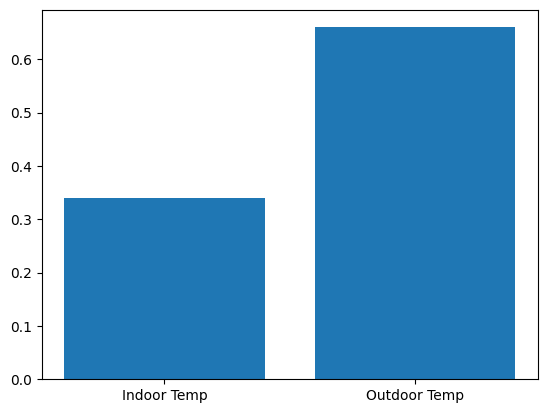

In [16]:
import matplotlib.pyplot as plt
feature_importances = rf_model.feature_importances_
plt.bar(['Indoor Temp', 'Outdoor Temp'], feature_importances)
plt.show()


In [17]:
import joblib

# Assuming rf_model is your trained RandomForestRegressor
# and scaler is your trained scaler (e.g., StandardScaler or MinMaxScaler)

# Save the model to a .pkl file
joblib.dump(rf_model, 'rf_model.pkl')

# Save the scaler to a .pkl file
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler have been saved as 'rf_model.pkl' and 'scaler.pkl'")


Model and scaler have been saved as 'rf_model.pkl' and 'scaler.pkl'
